# Data retrieval

In [1]:
#!pip install bs4
import requests
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline

In [2]:
url = 'https://inshorts.com/en/read/technology'

In [3]:
news_data = []

In [4]:
news_category = url.split('/')
news_category

['https:', '', 'inshorts.com', 'en', 'read', 'technology']

In [5]:
news_category = news_category[-1]

In [6]:
data = requests.get(url)
data.content

b'<!doctype html>\n<html lang="en">\n\n<head>\n  <meta charset="utf-8" />\n  <style>\n    /* The Modal (background) */\n    .modal_contact {\n        display: none; /* Hidden by default */\n        position: fixed; /* Stay in place */\n        z-index: 8; /* Sit on top */\n        left: 0;\n        top: 0;\n        width: 100%; /* Full width */\n        height: 100%;\n        overflow: auto; /* Enable scroll if needed */\n        background-color: rgb(0,0,0); /* Fallback color */\n        background-color: rgba(0,0,0,0.4); /* Black w/ opacity */\n    }\n\n    /* Modal Content/Box */\n    .modal-content {\n        background-color: #fefefe;\n        margin: 15% auto;\n        padding: 20px !important;\n        padding-top: 0 !important;\n        /* border: 1px solid #888; */\n        text-align: center;\n        position: relative;\n        border-radius: 6px;\n    }\n\n    /* The Close Button */\n    .close {\n      left: 90%;\n      color: #aaa;\n      float: right;\n      font-size: 

In [7]:
soup = BeautifulSoup(data.content, 'html.parser')

In [8]:
news_articles = [{'news_headline': headline.find('span', attrs={'itemprop': 'headline'}).string,
                  'news_article': article.find('div', attrs={'itemprop': 'articleBody'}).string,
                  'news_category': news_category} 
                 for headline, article in zip(soup.find_all('div', 
                                                            class_ = ['news-card-title news-right-box']), 
                                              soup.find_all('div', class_=['news-card-content news-right-box']))]

In [9]:
news_data.extend(news_articles)
news_data

[{'news_headline': 'Govt got social media posts on COVID-19 removed due to misinformation: Reports',
  'news_article': 'The Centre has reportedly said that the removal of around 100 coronavirus-related posts on social media was due to "misinformation" and not because of criticism of the government. According to reports, the Ministry of Electronics and Information Technology (MeitY) has said that some people were "misusing" social media to create panic over the COVID-19 pandemic.',
  'news_category': 'technology'},
 {'news_headline': "I'm fine with only being known as Serena's husband: Reddit Co-founder",
  'news_article': 'Reddit Co-founder Alexis Ohanian said it\'s "fine" for him to be only known as tennis player Serena Williams\' husband. "I\'ll be a self-made billionaire one day and most people will still know me as Serena\'s husband (or Olympia\'s dad) and that\'s fine by me," the 38-year-old tech entrepreneur tweeted. Alexis and Serena married in 2017 and have a daughter together.

In [10]:
df = pd.DataFrame(news_data)

In [11]:
df = df[['news_headline', 'news_article', 'news_category']]

In [12]:
df.head(3)

,news_headline,news_article,news_category
0,Govt got social media posts on COVID-19 remove...,The Centre has reportedly said that the remova...,technology
1,I'm fine with only being known as Serena's hus...,"Reddit Co-founder Alexis Ohanian said it's ""fi...",technology
2,Zuckerberg says he lost 4.5 kg as he forgot to...,Facebook's CEO Mark Zuckerberg posted on Faceb...,technology


# Prepare user defined function to extract data from inshorts.com

In [13]:
urls_list = ['https://inshorts.com/en/read/technology',
             'https://inshorts.com/en/read/sports',
             'https://inshorts.com/en/read/world']

In [14]:
def datasetPrepare(urls_list):
    news_data = []
    for url in urls_list:
        news_category = url.split('/')[-1]
        data = requests.get(url)
        soup = BeautifulSoup(data.content, 'html.parser')
        news_articles = [{'news_headline': headline.find('span', attrs={"itemprop": "headline"}).string,
                          'news_article': article.find('div', attrs={"itemprop": "articleBody"}).string,
                          'news_category': news_category}
                         
                            for headline, article in 
                             zip(soup.find_all('div', class_=["news-card-title news-right-box"]),
                                 soup.find_all('div', class_=["news-card-content news-right-box"]))
                        ]
        news_data.extend(news_articles) 
    df =  pd.DataFrame(news_data)
    df = df[['news_headline', 'news_article', 'news_category']]
    return df    

In [15]:
news_df = datasetPrepare(urls_list)

In [16]:
news_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 3 columns):
news_headline    75 non-null object
news_article     75 non-null object
news_category    75 non-null object
dtypes: object(3)
memory usage: 1.9+ KB


In [17]:
news_df.head(5)

,news_headline,news_article,news_category
0,Govt got social media posts on COVID-19 remove...,The Centre has reportedly said that the remova...,technology
1,I'm fine with only being known as Serena's hus...,"Reddit Co-founder Alexis Ohanian said it's ""fi...",technology
2,Elon Musk trolled with big 'Mars sucks' billbo...,Elon Musk was trolled with a big billboard out...,technology
3,4-yr-old Pak girl becomes youngest Microsoft C...,Pakistan's government has announced that a fou...,technology
4,Zuckerberg says he lost 4.5 kg as he forgot to...,Facebook's CEO Mark Zuckerberg posted on Faceb...,technology


In [18]:
news_df.news_category.value_counts()

sports        25
technology    25
world         25
Name: news_category, dtype: int64

# Text Wrangling and Pre-processing

In [19]:
#!pip install spacy
import spacy
import nltk
from nltk.tokenize.toktok import ToktokTokenizer
import re
import unicodedata

In [20]:
#python -m spacy download en
nlp = spacy.load("en_core_web_sm")

In [21]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [22]:
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')
stopword_list.remove('no')
stopword_list.remove('not')

## Remove HTML tags

In [23]:
def strip_html_tags(text):
    soup = BeautifulSoup(text, "html.parser")
    stripped_text = soup.get_text()
    return stripped_text

strip_html_tags('<html><h2>Some important text</h2></html>')

'Some important text'

## Remove accented characters

In [24]:
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

remove_accented_chars('Sómě Áccěntěd těxt')

'Some Accented text'

## Remove special characters

In [25]:
def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text

In [26]:
remove_special_characters("Well this was fun! What do you think? 123#@!", remove_digits=True)

'Well this was fun What do you think '

## Text lemmatization

In [27]:
def lemmatize_text(text):
    text = nlp(text)
    text = ' '.join([word.lemma_ if word.lemma_ != '-PRON-' else word.text for word in text])
    return text

In [28]:
lemmatize_text("My system keeps crashing! his crashed yesterday, ours crashes daily")

'my system keep crash ! his crashed yesterday , ours crash daily'

## Text stemming

In [29]:
def simple_stemmer(text):
    ps = nltk.porter.PorterStemmer()
    text = ' '.join([ps.stem(word) for word in text.split()])
    return text

simple_stemmer("My system keeps crashing his crashed yesterday, ours crashes daily")

'My system keep crash hi crash yesterday, our crash daili'

## Remove stopwords

In [30]:
def remove_stopwords(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

remove_stopwords("The, and, if are stopwords, computer is not")

', , stopwords , computer not'

## Building a text normalizer

In [31]:
def normalize_corpus(corpus, html_stripping=True, contraction_expansion=True,
                     accented_char_removal=True, text_lower_case=True, 
                     text_lemmatization=True, special_char_removal=True, 
                     stopword_removal=True, remove_digits=True):
    
    normalized_corpus = []
    # normalize each document in the corpus
    for doc in corpus:
        # strip HTML
        if html_stripping:
            doc = strip_html_tags(doc)
        # remove accented characters
        if accented_char_removal:
            doc = remove_accented_chars(doc)
        # lowercase the text    
        if text_lower_case:
            doc = doc.lower()
        # remove extra newlines
        doc = re.sub(r'[\r|\n|\r\n]+', ' ',doc)
        # lemmatize text
        if text_lemmatization:
            doc = lemmatize_text(doc)
        # remove special characters and\or digits    
        if special_char_removal:
            # insert spaces between special characters to isolate them    
            special_char_pattern = re.compile(r'([{.(-)!}])')
            doc = special_char_pattern.sub(" \\1 ", doc)
            doc = remove_special_characters(doc, remove_digits=remove_digits)  
        # remove extra whitespace
        doc = re.sub(' +', ' ', doc)
        # remove stopwords
        if stopword_removal:
            doc = remove_stopwords(doc, is_lower_case=text_lower_case)
            
        normalized_corpus.append(doc)
        
    return normalized_corpus

## Pre-process and normalize news articles

In [32]:
news_df['full_text'] = news_df["news_headline"].map(str)+ '. ' + news_df["news_article"]

In [33]:
news_df['clean_text'] = normalize_corpus(news_df['full_text'])
norm_corpus = list(news_df['clean_text'])
news_df.iloc[1][['full_text', 'clean_text']].to_dict()

{'full_text': 'I\'m fine with only being known as Serena\'s husband: Reddit Co-founder. Reddit Co-founder Alexis Ohanian said it\'s "fine" for him to be only known as tennis player Serena Williams\' husband. "I\'ll be a self-made billionaire one day and most people will still know me as Serena\'s husband (or Olympia\'s dad) and that\'s fine by me," the 38-year-old tech entrepreneur tweeted. Alexis and Serena married in 2017 and have a daughter together.',
 'clean_text': 'I fine know serena husband reddit co founder reddit co founder alexis ohanian say fine know tennis player serena william husband I self make billionaire one day people still know I serena husband olympia dad fine I year old tech entrepreneur tweet alexis serena marry daughter together'}

# Save the news articles

In [34]:
news_df.to_csv('news.csv', index=False, encoding='utf-8')

# Tagging Parts of Speech

In [35]:
news_df = pd.read_csv('news.csv')

In [36]:
corpus = normalize_corpus(news_df['full_text'], text_lower_case=False, 
                          text_lemmatization=False, special_char_removal=False)

sentence = str(news_df.iloc[1].news_headline)
sentence_nlp = nlp(sentence)

In [37]:
spacy_pos_tagged = [(word, word.tag_, word.pos_) for word in sentence_nlp]
pd.DataFrame(spacy_pos_tagged, columns=['Word', 'POS tag', 'Tag type'])

,Word,POS tag,Tag type
0,I,PRP,PRON
1,'m,VBP,VERB
2,fine,JJ,ADJ
3,with,IN,ADP
4,only,RB,ADV
5,being,VBG,AUX
6,known,VBN,VERB
7,as,IN,ADP
8,Serena,NNP,PROPN
9,'s,POS,PART


In [38]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [39]:
nltk.download('maxent_treebank_pos_tagger')

[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_treebank_pos_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Sanjana\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [41]:
nltk_pos_tagged = nltk.pos_tag(sentence.split())

In [42]:
pd.DataFrame(nltk_pos_tagged, columns=['Word', 'POS tag'])

,Word,POS tag
0,I'm,NNP
1,fine,NN
2,with,IN
3,only,JJ
4,being,VBG
5,known,VBN
6,as,IN
7,Serena's,NNP
8,husband:,VBD
9,Reddit,NNP


# Named Entity Recognition

In [43]:
sentence = str(news_df.iloc[1].full_text)

In [44]:
sentence

'I\'m fine with only being known as Serena\'s husband: Reddit Co-founder. Reddit Co-founder Alexis Ohanian said it\'s "fine" for him to be only known as tennis player Serena Williams\' husband. "I\'ll be a self-made billionaire one day and most people will still know me as Serena\'s husband (or Olympia\'s dad) and that\'s fine by me," the 38-year-old tech entrepreneur tweeted. Alexis and Serena married in 2017 and have a daughter together.'

In [45]:
sentence_nlp = nlp(sentence)

In [46]:
sentence_nlp

I'm fine with only being known as Serena's husband: Reddit Co-founder. Reddit Co-founder Alexis Ohanian said it's "fine" for him to be only known as tennis player Serena Williams' husband. "I'll be a self-made billionaire one day and most people will still know me as Serena's husband (or Olympia's dad) and that's fine by me," the 38-year-old tech entrepreneur tweeted. Alexis and Serena married in 2017 and have a daughter together.

In [47]:
print([(word, word.ent_type_) for word in sentence_nlp if word.ent_type_])

[(Serena, 'PERSON'), (Reddit, 'PERSON'), (Co, 'PERSON'), (-, 'PERSON'), (founder, 'PERSON'), (Reddit, 'PERSON'), (Co, 'PERSON'), (-, 'PERSON'), (founder, 'PERSON'), (Alexis, 'PERSON'), (Ohanian, 'PERSON'), (Serena, 'PERSON'), (Williams, 'PERSON'), (', 'PERSON'), (one, 'DATE'), (day, 'DATE'), (Serena, 'PERSON'), (Olympia, 'PERSON'), (38, 'DATE'), (-, 'DATE'), (year, 'DATE'), (-, 'DATE'), (old, 'DATE'), (Serena, 'PERSON'), (2017, 'DATE')]


In [48]:
named_entities = []
for sentence in corpus:
    temp_entity_name = ''
    temp_named_entity = None
    sentence = nlp(sentence)
    for word in sentence:
        term = word.text 
        tag = word.ent_type_
        if tag:
            temp_entity_name = ' '.join([temp_entity_name, term]).strip()
            temp_named_entity = (temp_entity_name, tag)
        else:
            if temp_named_entity:
                named_entities.append(temp_named_entity)
                temp_entity_name = ''
                temp_named_entity = None

entity_frame = pd.DataFrame(named_entities, 
                            columns=['Entity Name', 'Entity Type'])

In [49]:
top_entities = (entity_frame.groupby(by=['Entity Name', 'Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Name,India,first,COVID-19,China,four,US,NFT,KKR,Pakistan,Indian,Saturday,COVID-19,Sehwag,Sunday,Chinese
Entity Type,GPE,ORDINAL,PERSON,GPE,CARDINAL,GPE,ORG,ORG,GPE,NORP,DATE,PRODUCT,PERSON,DATE,NORP
Frequency,41,12,12,8,8,8,8,8,7,6,6,5,5,4,4


In [50]:
top_entities = (entity_frame.groupby(by=['Entity Type'])
                           .size()
                           .sort_values(ascending=False)
                           .reset_index().rename(columns={0 : 'Frequency'}))
top_entities.T.iloc[:,:15]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Entity Type,PERSON,ORG,GPE,CARDINAL,DATE,NORP,ORDINAL,LOC,PRODUCT,WORK_OF_ART,TIME,PERCENT,QUANTITY,FAC,EVENT
Frequency,154,126,121,91,53,41,28,12,10,8,6,5,4,3,1


# Emotion and Sentiment Analysis

In [51]:
#!pip install afinn
from afinn import Afinn

In [52]:
af = Afinn()

In [53]:
sentiment_scores = [af.score(article) for article in corpus]

In [54]:
sentiment_category = ['positive' if score > 0 
                          else 'negative' if score < 0 
                              else 'neutral' 
                                  for score in sentiment_scores]

In [55]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores, sentiment_category]).T

In [56]:
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']

In [57]:
df['sentiment_score'] = df.sentiment_score.astype('float')

In [58]:
df.groupby(by=['news_category']).describe()

sentiment_score                                            
                        count  mean       std   min   25%  50%  75%   max
news_category                                                            
sports                   25.0  0.64  6.454198 -10.0  -5.0  0.0  5.0  18.0
technology               25.0 -0.28  5.111425 -11.0  -2.0 -1.0  3.0   9.0
world                    25.0 -5.68  7.098826 -20.0 -10.0 -5.0  0.0   5.0

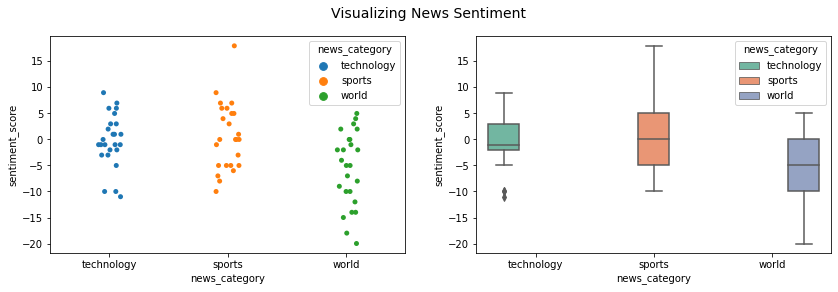

In [59]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 4))
sp = sns.stripplot(x='news_category', y="sentiment_score",  hue='news_category', data=df, ax=ax1)
bp = sns.boxplot(x='news_category', y="sentiment_score", hue='news_category', data=df, palette="Set2", ax=ax2)
t = f.suptitle('Visualizing News Sentiment', fontsize=14)

C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


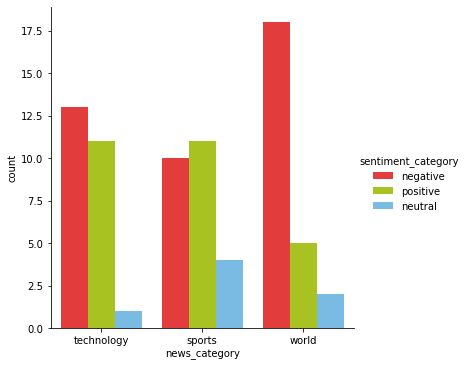

In [60]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [61]:
pos_idx = df[(df.news_category=='technology') & (df.sentiment_score == 2)].index[0]

In [62]:
neg_idx = df[(df.news_category=='technology') & (df.sentiment_score == -2)].index[0]

In [63]:
print('Most Negative Tech News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive Tech News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative Tech News Article: Facebook's CEO Mark Zuckerberg posted on Facebook that he's lost 4.5 kg because he forgot to eat meals due to the excitement over his work. His father Edward Zuckerberg in a comment asked, "Do you need Mom and I to deliver meals?" The response went viral with one user commenting, "That's what most Indian parents do and I love it."

Most Positive Tech News Article: Apple has said that it is starting a programme to help employees get voluntary COVID-19 vaccinations at its offices. It is working with drugstore chain Walgreens Boots Alliance as its vendor and will open a website for its employees to sign up for appointments. The programme doesn't require an immediate return of the employees to the offices.
 



In [64]:
df1 = df[df.news_category=='world']
pd.unique(df1.sentiment_score)

array([-15.,  -2.,  -9.,   3., -18.,  -4., -12., -14.,   2.,  -1.,   5.,
         0.,  -5., -10., -20.,   4.,  -7.,  -8.])

In [65]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score == 4)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score == -4.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: The United States is "deeply concerned by the severe COVID-19 outbreak in India", White House National Security Advisor Jake Sullivan said on Sunday. "We are working round the clock to deploy more supplies and support to our friends and partners in India as they bravely battle this pandemic," said Sullivan.

Most Positive World News Article: Joe Biden has become the first US President to recognise the massacres of an estimated 15 lakh Armenians under the Ottoman Empire during WWI as genocide. Biden's move is being welcomed by Armenians with "great enthusiasm", Armenia's PM Nikol Pashinyan said. Turkish Foreign Minister Mevlüt Çavuşoğlu said that Turkey "entirely rejects" the US decision which is based "solely on populism".


In [66]:
from textblob import TextBlob

In [67]:
sentiment_scores_tb = [round(TextBlob(article).sentiment.polarity, 3) for article in news_df['clean_text']]

In [68]:
sentiment_category_tb = ['positive' if score > 0 
                             else 'negative' if score < 0 
                                 else 'neutral' 
                                     for score in sentiment_scores_tb]

In [69]:
df = pd.DataFrame([list(news_df['news_category']), sentiment_scores_tb, sentiment_category_tb]).T
df.columns = ['news_category', 'sentiment_score', 'sentiment_category']
df['sentiment_score'] = df.sentiment_score.astype('float')
df.groupby(by=['news_category']).describe()

sentiment_score                                                 \
                        count     mean       std    min    25%    50%    75%   
news_category                                                                  
sports                   25.0  0.10668  0.189826 -0.287 -0.012  0.100  0.228   
technology               25.0  0.06200  0.177411 -0.267 -0.029  0.000  0.188   
world                    25.0 -0.02928  0.275397 -1.000 -0.100  0.034  0.140   

                    
               max  
news_category       
sports         0.5  
technology     0.4  
world          0.3

In [70]:
df.head()

,news_category,sentiment_score,sentiment_category
0,technology,-0.030,negative
1,technology,0.338,positive
2,technology,0.027,positive
3,technology,0.100,positive
4,technology,0.188,positive


C:\Users\Sanjana\anaconda3\lib\site-packages\seaborn\categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


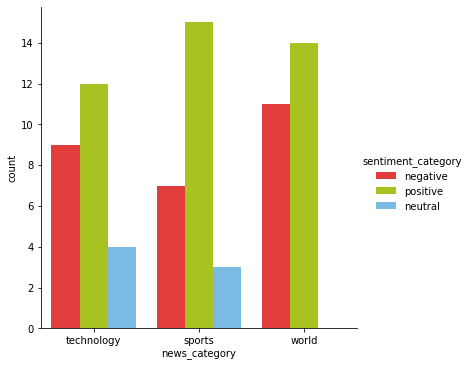

In [71]:
fc = sns.factorplot(x="news_category", hue="sentiment_category", 
                    data=df, kind="count", 
                    palette={"negative": "#FE2020", 
                             "positive": "#BADD07", 
                             "neutral": "#68BFF5"})

In [72]:
pos_idx = df[(df.news_category=='world') & (df.sentiment_score > 0.)].index[0]
neg_idx = df[(df.news_category=='world') & (df.sentiment_score < -0.)].index[0]

print('Most Negative World News Article:', news_df.iloc[neg_idx][['news_article']][0])
print()
print('Most Positive World News Article:', news_df.iloc[pos_idx][['news_article']][0])

Most Negative World News Article: A man in Spain's Mallorca has been arrested after infecting 22 people with COVID-19. The man allegedly went to work and gym with 104-degree fever while waiting for his coronavirus test result. He even walked around his workplace, saying, "I am going to infect you all with coronavirus." Three of the 22 people he infected were babies.

Most Positive World News Article: Swedish climate activist Greta Thunberg on Saturday said, "Heartbreaking to follow the recent developments in India. The global community must step up and immediately offer the assistance needed." She tweeted a news report about India's ongoing COVID-19 crisis, wherein the video shows COVID-19 patients lying on stretchers outside hospital and many waiting for medical oxygen.


In [73]:
#install model_evaluation_utils using model_evaluation_utils.py link:- notebooks/Ch05_Building_Tuning_and_Deploying_Models/model_evaluation_utils.py
import model_evaluation_utils as meu
meu.display_confusion_matrix(true_labels=sentiment_category, 
                                    predicted_labels=sentiment_category_tb, 
                                    classes=['negative', 'neutral', 'positive'])

                 Predicted:                 
                   negative neutral positive
Actual: negative         19       5       17
        neutral           2       1        4
        positive          6       1       20


C:\Users\Sanjana\Downloads\Residency\NLP_Artifacts\NLP_Artifacts\model_evaluation_utils.py:61: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  columns=pd.MultiIndex(levels=[['Predicted:'], classes],
C:\Users\Sanjana\Downloads\Residency\NLP_Artifacts\NLP_Artifacts\model_evaluation_utils.py:63: FutureWarning: the 'labels' keyword is deprecated, use 'codes' instead
  index=pd.MultiIndex(levels=[['Actual:'], classes],
